<a href="https://colab.research.google.com/github/eduardogn/jupyter_notebook_projects/blob/main/gsheets_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive to access uploaded files
from google.colab import drive
drive.mount('/content/drive/')

# Path to your service account key JSON file in Google Colab
SERVICE_ACCOUNT_FILE = '/content/drive/MyDrive/Data Analytics/path.json'

# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Authenticate with Google Sheets API
credentials = ServiceAccountCredentials.from_json_keyfile_name(SERVICE_ACCOUNT_FILE, scope)
gc = gspread.authorize(credentials)

# Open the Google Sheet by name or by URL
spreadsheet = gc.open('mrr-log-by-customer')

# Select the specific sheet
worksheet = spreadsheet.worksheet('db')

# Get all data from the sheet
data = worksheet.get_all_records()

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.describe()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Customer Email,Customer Type,LTV,LTV Check,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,...,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024,May 2024,Jun 2024,RS Type,DS Type
count,2583,2583,2583,2583,2583,2583,2583,2583,2583,2583,...,2583,2583,2583,2583,2583,2583,2583,2583,2583,2583
unique,1342,4,387,422,2,3,2,2,2,2,...,87,88,92,92,90,91,91,96,4,5
top,,#N/A,,$0,$0,$0,$0,$0,$0,$0,...,$0,$0,$0,$0,$0,$0,$0,$0,,
freq,1241,1240,1119,1914,2582,2581,2581,2581,2581,2581,...,2343,2342,2346,2336,2343,2338,2341,2334,2191,2287


In [ ]:
df.dtypes

Customer Email    object
Customer Type     object
LTV               object
LTV Check         object
Jan 2019          object
                   ...  
Apr 2024          object
May 2024          object
Jun 2024          object
RS Type           object
DS Type           object
Length: 72, dtype: object

In [ ]:
selected_columns = df.columns[4:]
for col in selected_columns:
    df[col] = pd.to_numeric(df[col].str.replace('$', ''), errors='coerce')

filtered_df = df[df['Customer Type'] == 'Datashake']
filtered_df.head()

,Customer Email,Customer Type,LTV,LTV Check,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,...,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024,May 2024,Jun 2024,RS Type,DS Type
0,development@3birds.net,Datashake,"$50,011","$57,004",0.0,0.0,0.0,0.0,0.0,0.0,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,NaN,NaN
1,hcoleman@localclarity.com,Datashake,"$50,199","$56,193",0.0,0.0,0.0,0.0,0.0,0.0,...,999.0,999.0,999.0,999.0,999.0,999.0,999.0,999.0,NaN,NaN
2,reviewshake@getthematic.com,Datashake,$0,$396,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,198.0,198.0,NaN,NaN
3,sbhabad@vizium.com,Datashake,"$8,712","$10,455",0.0,0.0,0.0,0.0,0.0,0.0,...,249.0,249.0,249.0,249.0,249.0,249.0,249.0,249.0,NaN,NaN
4,operations@issuu.com,Datashake,"$6,435","$8,046",0.0,0.0,0.0,0.0,0.0,0.0,...,198.0,198.0,198.0,198.0,198.0,198.0,198.0,198.0,NaN,NaN


In [ ]:
# Sum all rows for each column
selected_columns = filtered_df.iloc[:, 4:70]
column_sums = selected_columns.sum(axis=0)
print(column_sums)

Jan 2019        0.0
Feb 2019        0.0
Mar 2019        0.0
Apr 2019        0.0
May 2019        0.0
             ...   
Feb 2024    32953.0
Mar 2024    32160.0
Apr 2024    34433.0
May 2024    35864.0
Jun 2024    36244.0
Length: 66, dtype: float64


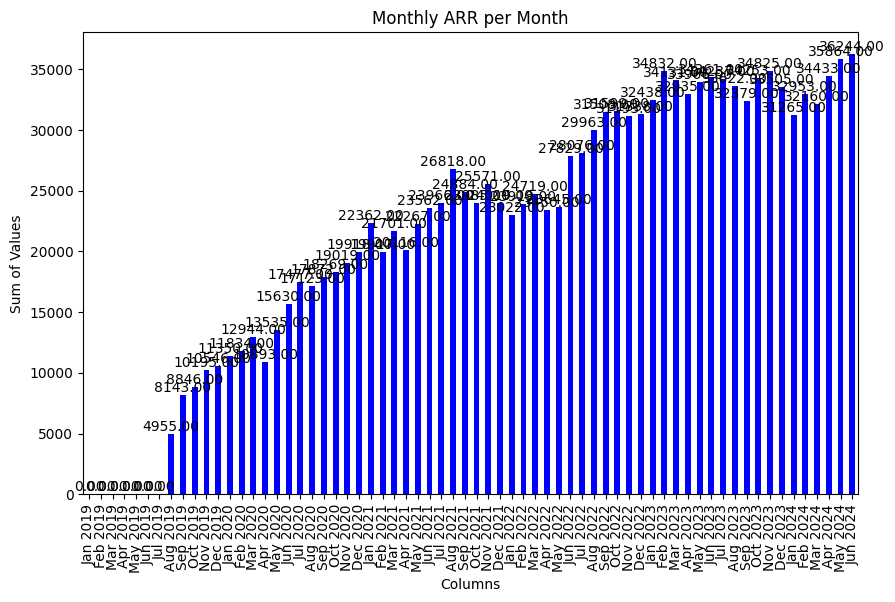

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = column_sums.plot(kind='bar', color='b')

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Monthly ARR per Month')

for i, v in enumerate(column_sums):
    ax.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom')

# Show plot
plt.show()